<a href="https://colab.research.google.com/github/shemalshakil/Enhancement_of_underwater_images/blob/main/Enhancing_underwater_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr, mean_squared_error as mse
from skimage import img_as_float
import matplotlib.pyplot as plt

# Step 1: Load and Display Input Image

In [ ]:
image_path = "/content/Input_image.png"   # Add your image path here
input_image = cv2.imread(image_path)
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

(np.float64(-0.5), np.float64(299.5), np.float64(223.5), np.float64(-0.5))

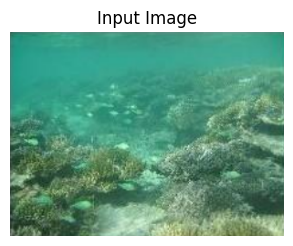

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Input Image")
plt.imshow(input_image)
plt.axis('off')

Step 2: Apply Gaussian Filtering

(np.float64(-0.5), np.float64(299.5), np.float64(223.5), np.float64(-0.5))

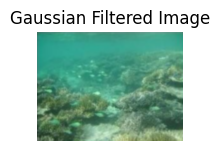

In [ ]:
gaussian_filtered = cv2.GaussianBlur(input_image, (5, 5), 0)

plt.subplot(1, 3, 2)
plt.title("Gaussian Filtered Image")
plt.imshow(gaussian_filtered)
plt.axis('off')

Step 3: Apply Median Filtering

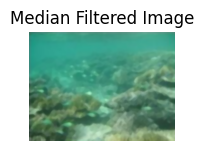

In [ ]:
median_filtered = cv2.medianBlur(gaussian_filtered, 5)

plt.subplot(1, 3, 3)
plt.title("Median Filtered Image")
plt.imshow(median_filtered)
plt.axis('off')

plt.show()

 Step 4: Color Map Dehazing (Contrast Enhancement)

In [ ]:
def color_map_dehazing(image):
    # Convert to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Adjusting brightness and contrast
    hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

    # Convert back to RGB
    dehazed = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    return dehazed

enhanced_image = color_map_dehazing(median_filtered)

Display Enhanced Image

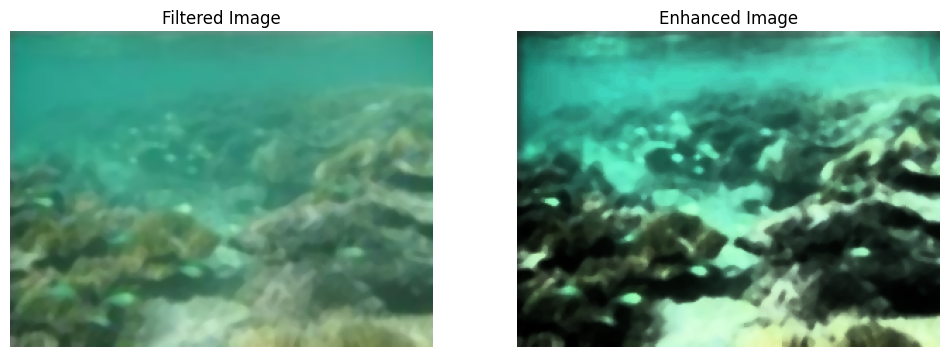

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Filtered Image")
plt.imshow(median_filtered)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Enhanced Image")
plt.imshow(enhanced_image)
plt.axis('off')
plt.show()

Step 5: Evaluate Performance Metrics

In [ ]:
from skimage.metrics import structural_similarity as ssim
from skimage import img_as_ubyte, img_as_float
import numpy as np

Function to calculate UIQM

In [ ]:
def calculate_uiqm(image):

    # Ensure image is in uint8 format
    image = img_as_ubyte(image)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # UICM (Colorfulness)
    rg = np.std(image[:,:,0] - image[:,:,1])
    yb = np.std((image[:,:,0] + image[:,:,1]) / 2 - image[:,:,2])
    uicm = np.sqrt(rg**2 + yb**2)

    # UISM (Sharpness)
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    uism = np.mean(np.abs(laplacian))

    # UIConM (Contrast)
    contrast = np.std(gray)
    uiconm = contrast

    # Final UIQM score
    uiqm = 0.3 * uicm + 0.3 * uism + 0.4 * uiconm
    return uiqm

Function to evaluate all metrics

In [ ]:
# Function to evaluate all metrics with dynamic win_size
def evaluate_metrics(original, enhanced):

    # Convert to float for metric calculation
    original = img_as_float(original)
    enhanced = img_as_float(enhanced)

    # PSNR
    psnr_value = psnr(original, enhanced)

    # Dynamic win_size selection
    min_dim = min(original.shape[0], original.shape[1])
    win_size = min(7, min_dim)

    # SSIM with channel_axis and win_size
    ssim_value = ssim(
        img_as_ubyte(original),
        img_as_ubyte(enhanced),
        win_size=win_size,
        channel_axis=-1
    )

    # Convert enhanced image to uint8 before UIQM calculation
    enhanced_uint8 = img_as_ubyte(enhanced)
    uiqm_value = calculate_uiqm(enhanced_uint8)

    return psnr_value, ssim_value, uiqm_value

# Compute Metrics
psnr_value, ssim_value, uiqm_value = evaluate_metrics(input_image, enhanced_image)



PSNR: 15.75
SSIM: 0.61
UIQM: 50.87
Enhanced image saved at: /mnt/data/enhanced_underwater_image.jpg


Display Results Save the final enhanced image

In [ ]:

print(f"PSNR: {psnr_value:.2f}")
print(f"SSIM: {ssim_value:.2f}")
print(f"UIQM: {uiqm_value:.2f}")

output_path = "D:/21blc1104/imageprocessing/Output_image.png"
cv2.imwrite(output_path, cv2.cvtColor(img_as_ubyte(enhanced_image), cv2.COLOR_RGB2BGR))
print(f"Enhanced image saved at: {output_path}")

PSNR: 15.75
SSIM: 0.61
UIQM: 50.87
Enhanced image saved at: D:/21blc1104/imageprocessing/Output_image.png
